  # Fundamentals of Software System
  ## Software Evolution - Part I Assignment


In [ ]:
# Clone the Transformers repository and install packages required

!git clone https://github.com/huggingface/transformers
!pip install pydriller pandas

Cloning into 'transformers'...
remote: Enumerating objects: 385462, done.
remote: Counting objects: 100% (1836/1836), done.
remote: Compressing objects: 100% (803/803), done.
remote: Total 385462 (delta 1460), reused 1033 (delta 1033), pack-reused 383626 (from 3)
Receiving objects: 100% (385462/385462), 401.10 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (296766/296766), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Checkout the required tag, which is v4.57.0

%cd /content/transformers
#!git fetch --tags
!git checkout --detach tags/v4.57.0

/content/transformers
Updating files: 100% (3593/3593), done.
HEAD is now at 8ac2b916b0 Release: v4.57.0


# **Task 1: Defect Analysis**

In [ ]:
import pandas as pd
from pydriller import Repository
from datetime import datetime

# Repo cloned in Colab
REPO_PATH = "/content/transformers"

# Set up the cutoff date of 2023-01-01
CUTOFF_DATE = datetime(2023, 1, 1)

# Keywords that indicate defect resolutions
DEFECT_KEYWORDS = ['fix', 'bug', 'error', 'issue', 'defect', 'fail', 'broken']

def task1_defect_analysis_extraction():
    print(f"--- Starting Task 1 Data Extraction from {REPO_PATH} since {CUTOFF_DATE.date()} ---")

    miner = Repository(
        REPO_PATH,
        since=CUTOFF_DATE,
        only_modifications_with_file_types=['.py']
    )

    defect_commits_dates = []
    file_defects = {}

    for commit in miner.traverse_commits():
        commit_msg_lower = commit.msg.lower()
        is_defect_fix = any(keyword in commit_msg_lower for keyword in DEFECT_KEYWORDS)

        if is_defect_fix:
            # normalize to UTC to avoid tz-aware conversion errors
            defect_commits_dates.append(commit.committer_date.astimezone(tz=None))
            for modification in commit.modified_files:
                path = modification.new_path or modification.old_path
                if path and path.endswith('.py'):
                    file_defects[path] = file_defects.get(path, 0) + 1

    # datetime index
    df_dates = pd.DataFrame({'date': defect_commits_dates})
    df_dates['date'] = pd.to_datetime(df_dates['date'], utc=True)
    df_dates = df_dates.set_index('date')
    defects_per_month = df_dates.resample('M').size()

    s_file_defects = pd.Series(file_defects)

    print("--- Data Extraction Complete ---")

    # Saving results to CSV
    defects_per_month.to_csv("/content/defects_per_month.csv", header=["count"])
    s_file_defects.to_csv("/content/file_defects.csv", header=["count"])
    print("Results written to /content/defects_per_month.csv and /content/file_defects.csv")

    return defects_per_month, s_file_defects

# Running the extraction
defects_monthly, file_defects = task1_defect_analysis_extraction()
print("\nTotal Defects Per Month:\n", defects_monthly)
print("\nTop 5 Defective Files:\n", file_defects.nlargest(5))

# Download CSVs
from google.colab import files
files.download("/content/defects_per_month.csv")
files.download("/content/file_defects.csv")

--- Starting Task 1 Data Extraction from /content/transformers since 2023-01-01 ---
--- Data Extraction Complete ---
Results written to /content/defects_per_month.csv and /content/file_defects.csv

Total Defects Per Month:
 date
2023-01-31 00:00:00+00:00    121
2023-02-28 00:00:00+00:00    134
2023-03-31 00:00:00+00:00    158
2023-04-30 00:00:00+00:00    125
2023-05-31 00:00:00+00:00    155
2023-06-30 00:00:00+00:00    173
2023-07-31 00:00:00+00:00    125
2023-08-31 00:00:00+00:00    140
2023-09-30 00:00:00+00:00    113
2023-10-31 00:00:00+00:00    150
2023-11-30 00:00:00+00:00    129
2023-12-31 00:00:00+00:00    122
2024-01-31 00:00:00+00:00    112
2024-02-29 00:00:00+00:00    109
2024-03-31 00:00:00+00:00    141
2024-04-30 00:00:00+00:00    167
2024-05-31 00:00:00+00:00    145
2024-06-30 00:00:00+00:00    112
2024-07-31 00:00:00+00:00    145
2024-08-31 00:00:00+00:00    114
2024-09-30 00:00:00+00:00    139
2024-10-31 00:00:00+00:00    185
2024-11-30 00:00:00+00:00     97
2024-12-31 0

/tmp/ipython-input-2577709556.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  defects_per_month = df_dates.resample('M').size()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x500 with 0 Axes>

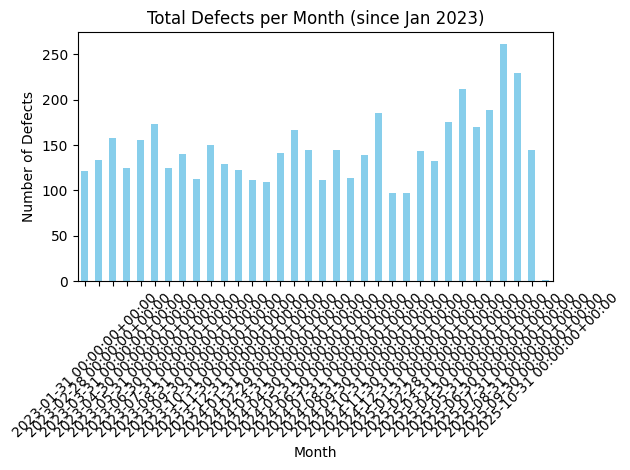

Top 2 defective files: ['src/transformers/modeling_utils.py', 'src/transformers/__init__.py']


/tmp/ipython-input-2533674521.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  file_monthly_counts[f] = df.resample('M').size()
/tmp/ipython-input-2533674521.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  file_monthly_counts[f] = df.resample('M').size()


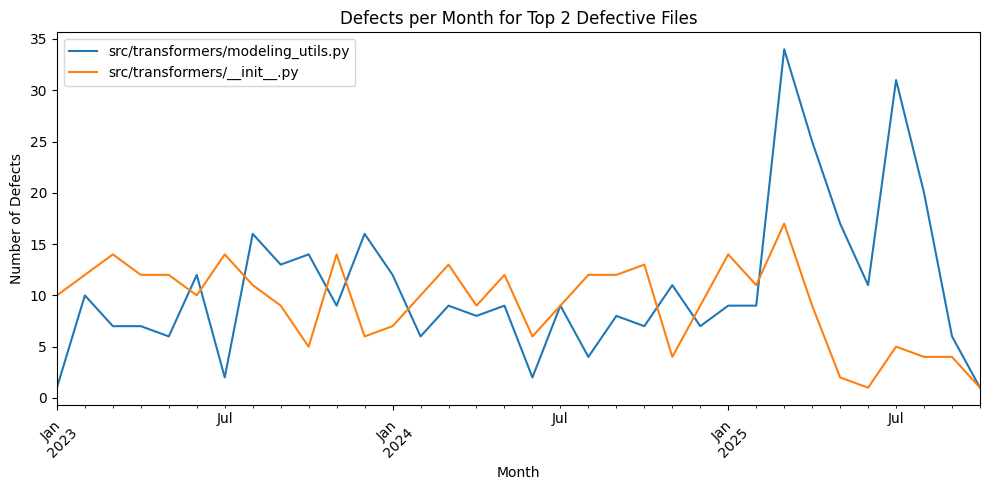

In [ ]:
# Visualization of Task 1 results

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSVs generated in the previous cell
defects_monthly = pd.read_csv("/content/defects_per_month.csv", index_col=0, parse_dates=True)
file_defects = pd.read_csv("/content/file_defects.csv", index_col=0)

# --- Plot 1: Total defects per month ---
plt.figure(figsize=(10,5))
defects_monthly.plot(kind="bar", color="skyblue", legend=False)
plt.title("Total Defects per Month (since Jan 2023)")
plt.xlabel("Month")
plt.ylabel("Number of Defects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Defects per month for top 2 defective files ---
# Identify top 2 files
top2_files = file_defects.nlargest(2, "count").index.tolist()
print("Top 2 defective files:", top2_files)

# Reload commit-level data if needed
# For simplicity, we’ll re-use the monthly counts but filter by file
from pydriller import Repository
from datetime import datetime

REPO_PATH = "/content/transformers"
CUTOFF_DATE = datetime(2023, 1, 1)
DEFECT_KEYWORDS = ['fix', 'bug', 'error', 'issue', 'defect', 'fail', 'broken']

file_monthly_counts = {f: [] for f in top2_files}
file_monthly_dates = {f: [] for f in top2_files}

for commit in Repository(REPO_PATH, since=CUTOFF_DATE, only_modifications_with_file_types=['.py']).traverse_commits():
    msg_lower = commit.msg.lower()
    if any(k in msg_lower for k in DEFECT_KEYWORDS):
        for mod in commit.modified_files:
            path = mod.new_path or mod.old_path
            if path in top2_files:
                file_monthly_dates[path].append(commit.committer_date)

# Convert to monthly counts per file
for f in top2_files:
    df = pd.DataFrame({'date': file_monthly_dates[f]})
    df['date'] = pd.to_datetime(df['date'], utc=True)
    df = df.set_index('date')
    file_monthly_counts[f] = df.resample('M').size()

# Plot both files on the same chart
plt.figure(figsize=(10,5))
for f in top2_files:
    file_monthly_counts[f].plot(label=f)
plt.title("Defects per Month for Top 2 Defective Files")
plt.xlabel("Month")
plt.ylabel("Number of Defects")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Task 2: Complexity Analysis**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

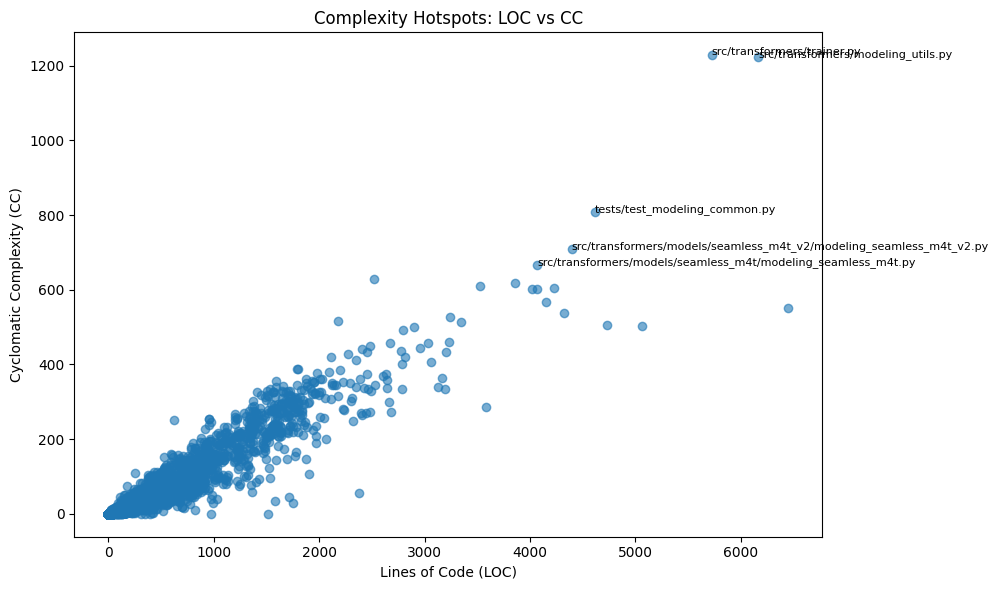

In [ ]:
!pip install radon

import os
import pandas as pd
import matplotlib.pyplot as plt
from radon.raw import analyze
from radon.complexity import cc_visit
from google.colab import files

repo_root = "/content/transformers"
py_files = []
for root, dirs, files_ in os.walk(repo_root):
    for file in files_:
      # Select all .py files in the repository
        if file.endswith(".py"):
            py_files.append(os.path.join(root, file))

results = []
for path in py_files:
    try:
        with open(path, "r", encoding="utf-8") as f:
            code = f.read()
        loc = analyze(code).loc
        cc_total = sum(block.complexity for block in cc_visit(code))
        results.append({"filename": path.replace(repo_root + "/", ""), "loc": loc, "cc": cc_total})
    except:
        continue

df_complexity = pd.DataFrame(results)
df_complexity.to_csv("/content/complexity_metrics.csv", index=False)

files.download("/content/complexity_metrics.csv")

plt.figure(figsize=(10,6))
plt.scatter(df_complexity["loc"], df_complexity["cc"], alpha=0.6)
plt.xlabel("Lines of Code (LOC)")
plt.ylabel("Cyclomatic Complexity (CC)")
plt.title("Complexity Hotspots: LOC vs CC")

top5 = df_complexity.nlargest(5, "cc")
for _, row in top5.iterrows():
    plt.annotate(row["filename"], (row["loc"], row["cc"]), fontsize=8)

plt.tight_layout()
plt.show()


/tmp/ipython-input-570716642.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = pd.merge(complexity_df, defects_df, on="filename", how="left").fillna(0)


Correlation between LOC and CC: 0.95


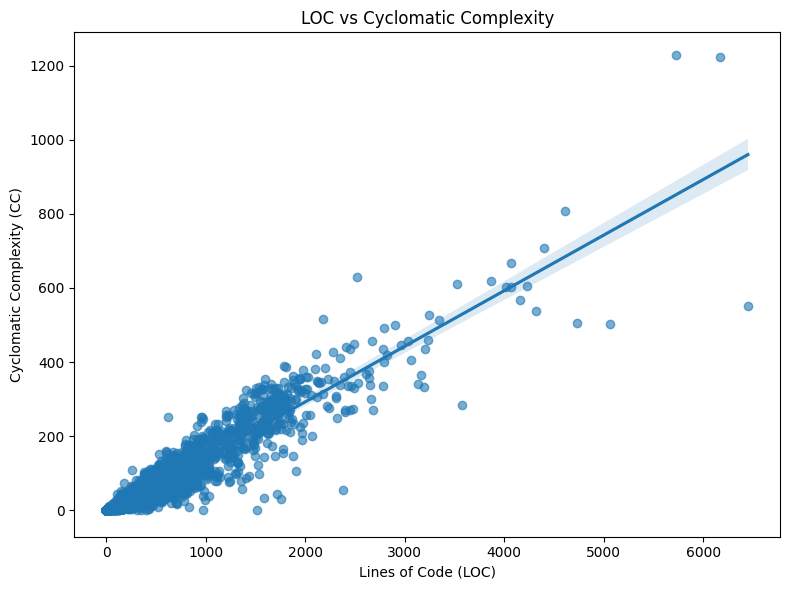

/tmp/ipython-input-570716642.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_cc_defects, _ = pearsonr(merged_df["cc"], merged_df["count"])


Correlation between CC and Defect Count: nan


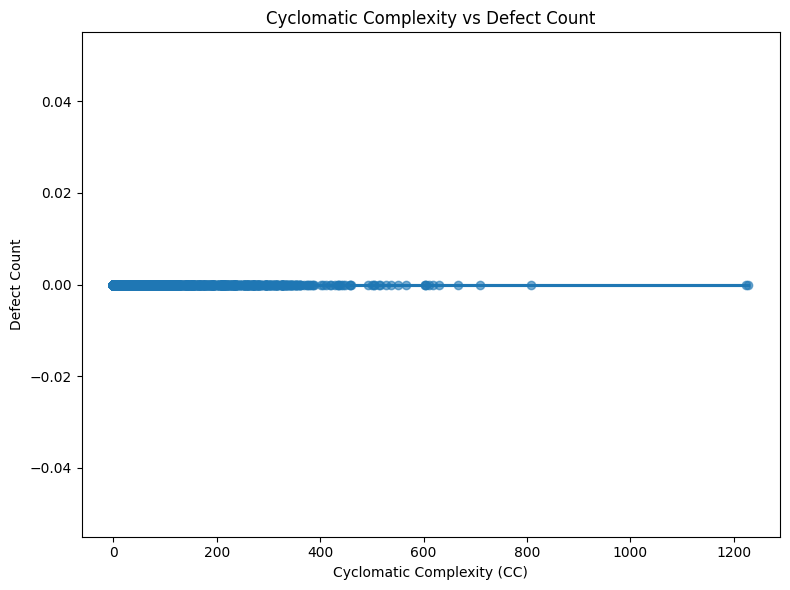

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import files

# Load CSVs
complexity_df = pd.read_csv("/content/complexity_metrics.csv")
defects_df = pd.read_csv("/content/file_defects.csv")

# Ensure both filename columns are strings
complexity_df["filename"] = complexity_df["filename"].astype(str)
defects_df.index = defects_df.index.astype(str)
defects_df = defects_df.reset_index().rename(columns={"index": "filename"})

# Merge and fill missing defect counts with 0
merged_df = pd.merge(complexity_df, defects_df, on="filename", how="left").fillna(0)

# Part 1: LOC vs CC correlation
corr_loc_cc, _ = pearsonr(merged_df["loc"], merged_df["cc"])
print(f"Correlation between LOC and CC: {corr_loc_cc:.2f}")

plt.figure(figsize=(8,6))
sns.regplot(x="loc", y="cc", data=merged_df, scatter_kws={"alpha":0.6})
plt.title("LOC vs Cyclomatic Complexity")
plt.xlabel("Lines of Code (LOC)")
plt.ylabel("Cyclomatic Complexity (CC)")
plt.tight_layout()
plt.show()

# Part 2: CC vs Defect Count correlation
corr_cc_defects, _ = pearsonr(merged_df["cc"], merged_df["count"])
print(f"Correlation between CC and Defect Count: {corr_cc_defects:.2f}")

plt.figure(figsize=(8,6))
sns.regplot(x="cc", y="count", data=merged_df, scatter_kws={"alpha":0.6})
plt.title("Cyclomatic Complexity vs Defect Count")
plt.xlabel("Cyclomatic Complexity (CC)")
plt.ylabel("Defect Count")
plt.tight_layout()
plt.show()

# Download merged CSV
merged_df.to_csv("/content/complexity_vs_defects.csv", index=False)
files.download("/content/complexity_vs_defects.csv")


# **Task 3: Coupling Analysis**

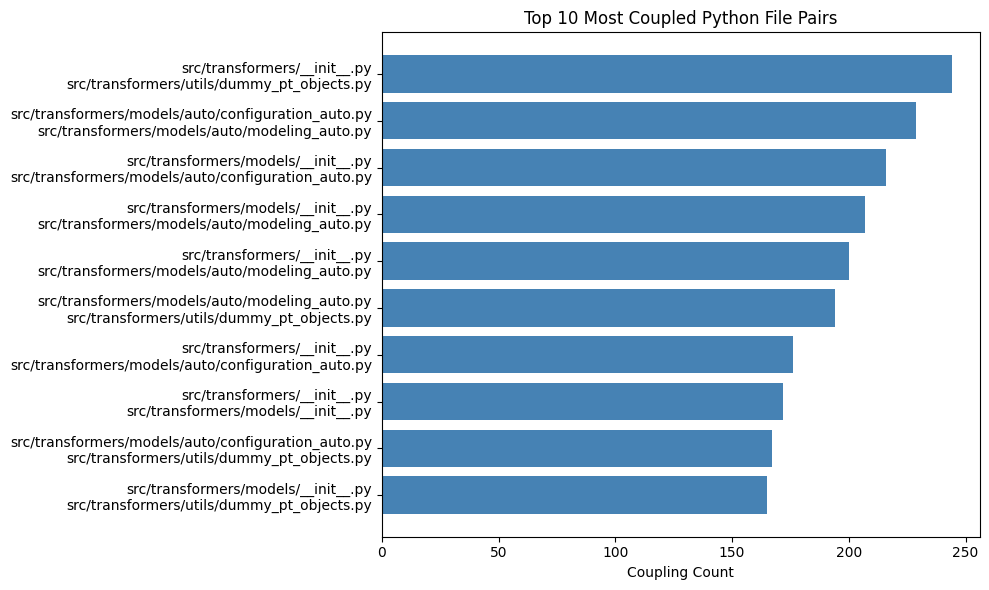

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pydriller

from pydriller import Repository
from collections import Counter
import itertools
import pandas as pd
import matplotlib.pyplot as plt

REPO_PATH = "/content/transformers"
CUTOFF_DATE = datetime(2023, 1, 1)

pair_counter = Counter()

for commit in Repository(REPO_PATH, since=CUTOFF_DATE).traverse_commits():
    files = [mod.new_path or mod.old_path for mod in commit.modified_files if mod.filename.endswith(".py")]
    files = list(set(files))  # remove duplicates
    for pair in itertools.combinations(sorted(files), 2):
        pair_counter[pair] += 1

# Convert to DataFrame
df_pairs = pd.DataFrame(pair_counter.items(), columns=["pair", "count"])
df_pairs["file1"] = df_pairs["pair"].apply(lambda x: x[0])
df_pairs["file2"] = df_pairs["pair"].apply(lambda x: x[1])
df_pairs = df_pairs.drop(columns=["pair"])
df_pairs = df_pairs.sort_values(by="count", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
labels = [f"{f1}\n{f2}" for f1, f2 in zip(df_pairs["file1"], df_pairs["file2"])]
plt.barh(labels, df_pairs["count"], color="steelblue")
plt.xlabel("Coupling Count")
plt.title("Top 10 Most Coupled Python File Pairs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save CSV
df_pairs.to_csv("/content/coupling.csv", index=False)
from google.colab import files
files.download("/content/coupling.csv")


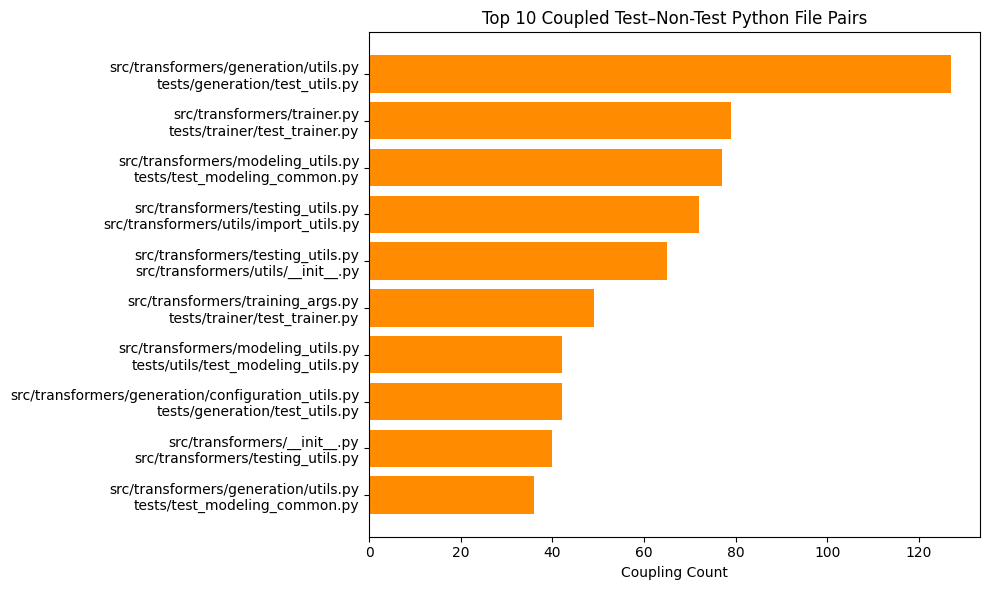

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pydriller import Repository
from collections import Counter
import itertools
import pandas as pd
import matplotlib.pyplot as plt

REPO_PATH = "/content/transformers"
CUTOFF_DATE = datetime(2023, 1, 1)

pair_counter = Counter()

for commit in Repository(REPO_PATH, since=CUTOFF_DATE).traverse_commits():
    files = [mod.new_path or mod.old_path for mod in commit.modified_files if mod.filename.endswith(".py")]
    files = list(set(files))
    test_files = [f for f in files if "/test" in f or f.startswith("test_")]
    non_test_files = [f for f in files if f not in test_files]
    for tf in test_files:
        for nf in non_test_files:
            pair = tuple(sorted([tf, nf]))
            pair_counter[pair] += 1

df_pairs = pd.DataFrame(pair_counter.items(), columns=["pair", "count"])
df_pairs["file1"] = df_pairs["pair"].apply(lambda x: x[0])
df_pairs["file2"] = df_pairs["pair"].apply(lambda x: x[1])
df_pairs = df_pairs.drop(columns=["pair"])
df_pairs = df_pairs.sort_values(by="count", ascending=False).head(10)

plt.figure(figsize=(10,6))
labels = [f"{f1}\n{f2}" for f1, f2 in zip(df_pairs["file1"], df_pairs["file2"])]
plt.barh(labels, df_pairs["count"], color="darkorange")
plt.xlabel("Coupling Count")
plt.title("Top 10 Coupled Test–Non-Test Python File Pairs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

df_pairs.to_csv("/content/test_coupling.csv", index=False)
from google.colab import files
files.download("/content/test_coupling.csv")


In [9]:
#Commit Co-ocurrence:

from pydriller import Repository
from collections import Counter
from datetime import datetime
import os

def most_coupled_test_file(target_file, repo_path="/content/transformers", cutoff=datetime(2023, 1, 1)):
    counter = Counter()
    for commit in Repository(repo_path, since=cutoff).traverse_commits():
        files = [mod.new_path or mod.old_path for mod in commit.modified_files if mod.filename.endswith(".py")]
        if target_file not in files:
            continue
        test_files = [f for f in files if "/test" in f or f.startswith("test_")]
        for tf in test_files:
            counter[tf] += 1
    return counter.most_common(1)[0][0] if counter else None

# Directory Proximity:

def closest_test_file_by_path(target_file, repo_path="/content/transformers"):
    target_parts = os.path.normpath(target_file).split(os.sep)
    best_score = -1
    best_match = None
    for root, dirs, files in os.walk(repo_path):
        for file in files:
            if file.endswith(".py") and ("test" in file or "/test" in root):
                test_path = os.path.join(root, file)
                test_parts = os.path.normpath(test_path).split(os.sep)
                score = sum(1 for a, b in zip(target_parts, test_parts) if a == b)
                if score > best_score:
                    best_score = score
                    best_match = test_path
    return best_match

target = "src/transformers/generation/utils.py"
print("Commit-based match:", most_coupled_test_file(target))
print("Path-based match:", closest_test_file_by_path(target))



Commit-based match: tests/generation/test_utils.py
Path-based match: /content/transformers/conftest.py
